## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Monday, 12th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import mode


#Reading the dataSet  
df_wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# From the dataset we are taking X and y i.e type of wine belongs to y and X belongs to  
#featrues associated w.r.t each class of wine
X = df_wine_data.iloc[:,1:].values
y = df_wine_data.iloc[:,0].values

#We are scaling the data
scaler = StandardScaler()
scaler.fit(X)
scaler_X = scaler.transform(X)

In [3]:
#Applying PCA for all components
pca = PCA()
p = pca.fit_transform(scaler_X)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [4]:
#Applying PCA for 2 components
pca_modified = PCA(n_components=2)
pca_X_mod = pca_modified.fit_transform(scaler_X)
pca_modified.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

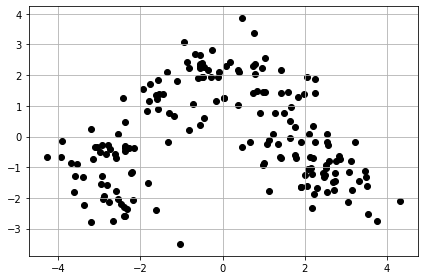

In [5]:
# Plotting the scatter  plot for the 2 components PCA 
for l in zip(np.unique(y)):
      plt.scatter(pca_X_mod[y == l, 0], 
                  pca_X_mod[y == l, 1], 
                  marker='o',
                  c="black")      
plt.grid()
plt.tight_layout()
plt.show()

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

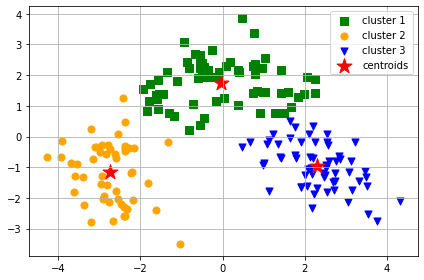

In [10]:
# Using k-means clustering to make clusters in the graph seen above

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # how many clusters
            init='random', 
            n_init=10,    
            max_iter=300, 
            tol=1e-04,    
            random_state=0)
y_km = km.fit_predict(pca_X_mod)

plt.scatter(pca_X_mod[y_km == 0, 0],
            pca_X_mod[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(pca_X_mod[y_km == 1, 0],
            pca_X_mod[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(pca_X_mod[y_km == 2, 0],
            pca_X_mod[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
#Match predicted labels with true labels using most common value for a cluster
k_labels =  km.labels_
labels_matched = np.zeros_like(k_labels)

for x in np.unique(k_labels):
    # finding and assigning the best-matching true label
    
    matched = [np.sum((k_labels==x)*(y==z)) for z in np.unique(y)]
    labels_matched[k_labels==x] = np.unique(y)[np.argmax(matched)]

In [12]:
#Calculate Accuracy Score

print("Accuracy Score:",accuracy_score(y, labels_matched))

Accuracy Score: 0.9662921348314607


In [13]:
#Calculating the Confusion Matrix
y_true = y
y_pred = labels_matched

confusionMatrix = confusion_matrix(y_true, y_pred, labels=[1,3,2])
print("Confusion Matrix is : \n",confusionMatrix)

Confusion Matrix is : 
 [[58  0  1]
 [ 0 48  0]
 [ 3  2 66]]


Text(0, 0.5, 'True label')

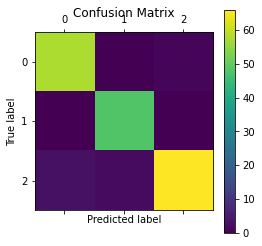

In [14]:
# Plotting the confusion Matrix
plt.matshow(confusionMatrix)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

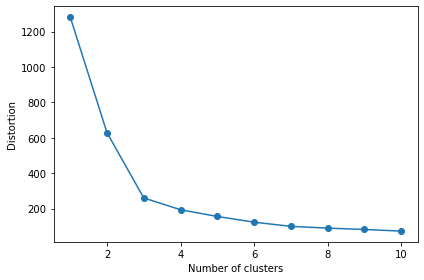

In [15]:
# We are plotting the distortions for k means clustering when k=1 to k=10 
#input is the PCA dataset with 2 components
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(pca_X_mod)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()